In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,confusion_matrix,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv(r"C:\Users\W10\Desktop\Files\Python II Machine Learning\Project\insurance.csv")

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
print(dataset.isnull().sum())
print(dataset.duplicated().sum())
dataset.drop_duplicates(inplace=True)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
1


<AxesSubplot:>

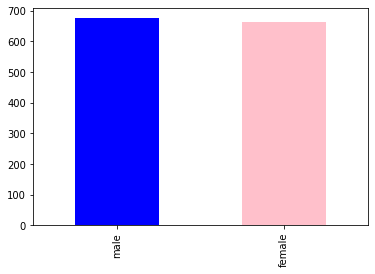

In [6]:
# Gender distrubition
plt.figure(figsize=(6,4))
dataset["sex"].value_counts().plot.bar(color=["b","pink"])

Max Bmi value: 53.13 
Min Bmi value: 15.96 
Average: 30.66345175766642


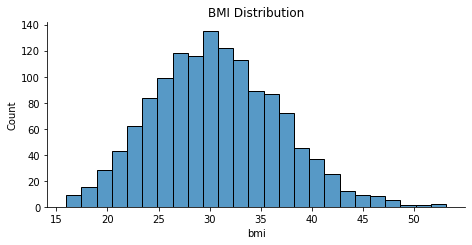

In [7]:
# Distribution of bmi
graph=sb.displot(dataset["bmi"],kind="hist")
graph.fig.set_size_inches(7,3)
graph.set(title="BMI Distribution")
print("Max Bmi value:",dataset["bmi"].max(),"\n""Min Bmi value:",dataset["bmi"].min(),"\n""Average:",dataset["bmi"].mean())

Text(0.5, 1.0, 'Age Distrubition')

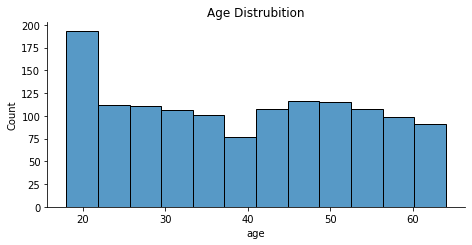

In [8]:
age_dist=sb.displot(dataset["age"],kind="hist")
age_dist.fig.set_size_inches(7,3)
plt.title("Age Distrubition")

In [9]:
# Transforming sex,smoker columns into numerical values
columns=["sex","smoker","region"]
label_encoder=LabelEncoder()
dataset[columns]=dataset[columns].apply(label_encoder.fit_transform)

In [10]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.019814  0.109344  0.041536 -0.025587  0.001626  0.298308
sex      -0.019814  1.000000  0.046397  0.017848  0.076596  0.004936  0.058044
bmi       0.109344  0.046397  1.000000  0.012755  0.003746  0.157574  0.198401
children  0.041536  0.017848  0.012755  1.000000  0.007331  0.016258  0.067389
smoker   -0.025587  0.076596  0.003746  0.007331  1.000000 -0.002358  0.787234
region    0.001626  0.004936  0.157574  0.016258 -0.002358  1.000000 -0.006547
charges   0.298308  0.058044  0.198401  0.067389  0.787234 -0.006547  1.000000


<AxesSubplot:>

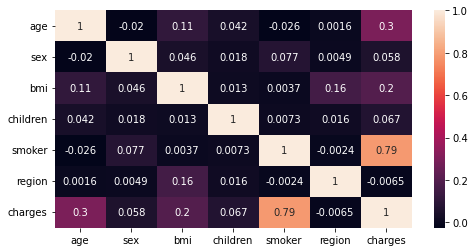

In [11]:
dataset_copy=dataset.copy()
corr_matrix=dataset_copy.corr()
print(corr_matrix) 
plt.figure(figsize=(8,4))
sb.heatmap(corr_matrix,annot=True)

Correlation between smoker and charges: 0.7872343672800326
Average values: smoker
0     8440.660307
1    32050.231832
Name: charges, dtype: float64 
 Maximum values: smoker
0    36910.60803
1    63770.42801
Name: charges, dtype: float64


<AxesSubplot:xlabel='smoker', ylabel='charges'>

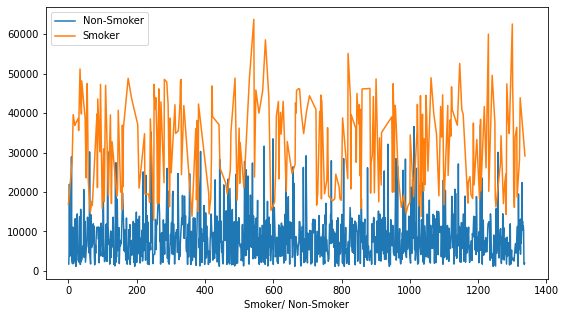

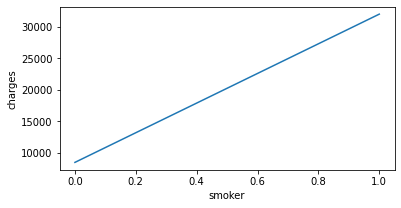

In [12]:
# Relationship between smoker and charges
variable1=dataset["smoker"]
variable2=dataset["charges"]
print("Correlation between smoker and charges:",variable1.corr(variable2)) # They have a proportional relationship
plt.figure(figsize=(9,5))
groupby1=dataset.groupby(["smoker"])["charges"]
groupby1.plot(legend=True)
plt.legend(["Non-Smoker","Smoker"])
plt.xlabel("Smoker/ Non-Smoker")
print("Average values:",groupby1.mean(),"\n","Maximum values:",groupby1.max())
# we can say that smokers highly pay more for medical costs. The average value paid by smokers is 32050. 4 times more than non-smokers.
plt.figure(figsize=(6,3))
plt.ylabel("charges")
groupby1.mean().plot()
# As we can see from the graph, medical costs are increasing as the smokers increase.

Correlation between smoker and region: -0.002358320865403758


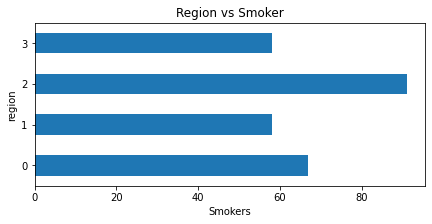

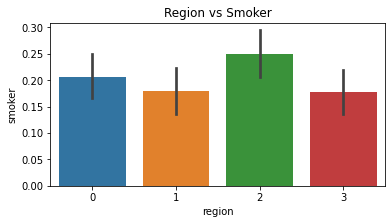

In [13]:
# Correlation between smoker and region columns
variable3=dataset["region"]
print("Correlation between smoker and region:",variable1.corr(variable3))
# There is no releationship between them
plt.figure(figsize=(7,3))
plt.title('Region vs Smoker')
plt.xlabel("Smokers")
groupby2=dataset.groupby(["region"])["smoker"].sum().plot.barh()
# Most smokers are from region 2, which is SOUTHEAST.

plt.figure(figsize=(6,3))
sb.barplot(x="region",y="smoker",data=dataset.copy())
plt.title('Region vs Smoker')
plt.show()

Correlation between smoker and region: 0.04639705986828657
sex
0    30.377749
1    30.943652
Name: bmi, dtype: float64
sex
0    16.815
1    15.960
Name: bmi, dtype: float64
sex
0    48.07
1    53.13
Name: bmi, dtype: float64


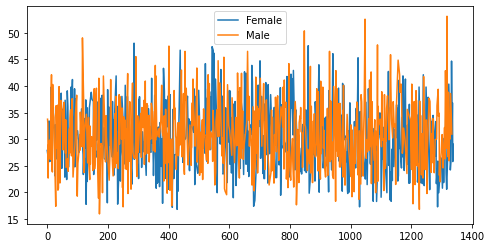

In [14]:
# Relationship between sex and bmi
variable4=dataset["sex"]
variable5=dataset["bmi"]
print("Correlation between smoker and region:",variable4.corr(variable5)) # The relationship between each other is very weak, almost none.
plt.figure(figsize=(8,4))
groupby3=dataset.groupby("sex")["bmi"]
groupby3.plot(legend=True)
plt.legend(["Female","Male"])
print(groupby3.mean()) # Average bmi for both gender is 30
print(groupby3.min()) # Minimum bmi for female is 16.8. For men it is 15.9.
print(groupby3.max()) # Maximum bmi for female is 48. For male, it is 53 

In [15]:
# Finding  the "region" with the most "children"
max_children=dataset.loc[dataset["children"].idxmax()]
print(max_children)
print("\n")
print("Maximum number of children:",max_children["children"])
print("\n""Region is",max_children["region"], "Corresponds for Southwest.") 

age           19.000
sex            0.000
bmi           28.600
children       5.000
smoker         0.000
region         3.000
charges     4687.797
Name: 32, dtype: float64


Maximum number of children: 5.0

Region is 3.0 Corresponds for Southwest.


Correlation value is: 0.10934361041896883


<AxesSubplot:xlabel='age', ylabel='bmi'>

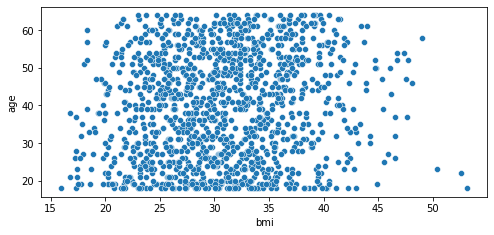

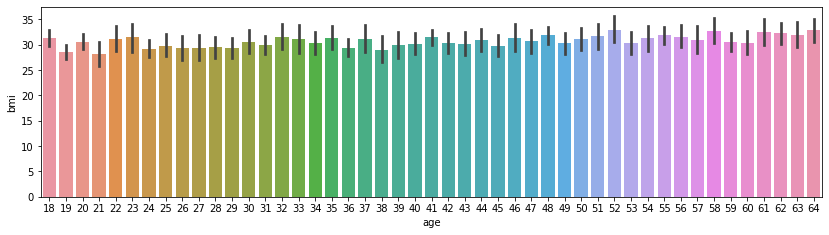

In [16]:
# Relationship between age and bmi
variable6=dataset["age"]
print("Correlation value is:",variable6.corr(variable5))
plt.figure(figsize=(8,3.5)) 
sb.scatterplot(variable5,variable6)
plt.figure(figsize=(14,3.5))
sb.barplot(x="age",y="bmi",data=dataset.copy())
# There are no any relation between these variables

Correlation value is: 0.016258479556880045


<AxesSubplot:title={'center':'Children vs Region'}, xlabel='children', ylabel='region'>

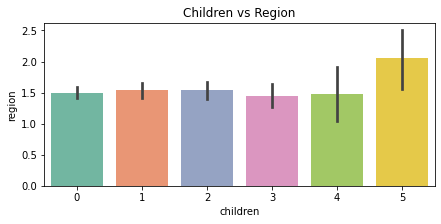

In [17]:
# Relationship between children and region
groupby4=dataset.groupby("children")["region"]
print("Correlation value is:",dataset["children"].corr(variable3))
plt.figure(figsize=(7,3))
plt.title("Children vs Region")
sb.barplot(x="children",y="region",data=dataset.copy(),palette="Set2")


In [18]:
# Finding outliers in bmi variable
def find_outliers_IQR(df): 
# FUNCTION FOR FINDING OUTLIERS FOR A VARIABLE 
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers_runtime=find_outliers_IQR(dataset["bmi"])
print(f"Number of outliers in BMI data set:"+ str(len(outliers_runtime)))
print("Max outlier value: "+ str(outliers_runtime.max()))
print("Min outlier value: "+ str(outliers_runtime.min()))


Number of outliers in BMI data set:9
Max outlier value: 53.13
Min outlier value: 47.41


Correlation value is: 0.016258479556880045
age           18.0000
sex            1.0000
bmi           53.1300
children       0.0000
smoker         0.0000
region         2.0000
charges     1163.4627
Name: 1317, dtype: float64


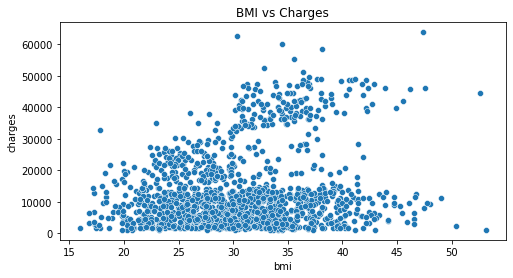

In [19]:
print("Correlation value is:",dataset["children"].corr(variable3))
plt.figure(figsize=(8,4))
plt.title("BMI vs Charges")
sb.scatterplot(x="bmi",y="charges",data=dataset.copy()) # From the graph we can see some outlier values.
bmi_max=dataset.loc[dataset["bmi"].idxmax()]
print(bmi_max)

<AxesSubplot:xlabel='region', ylabel='bmi'>

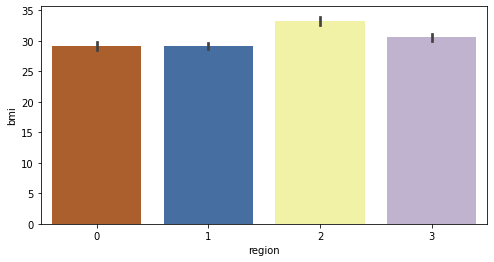

In [20]:
plt.figure(figsize=(8,4))
sb.barplot(x="region",y="bmi",data=dataset.copy(), palette="Accent_r") 

Text(0.5, 1.0, 'Age vs Charges')

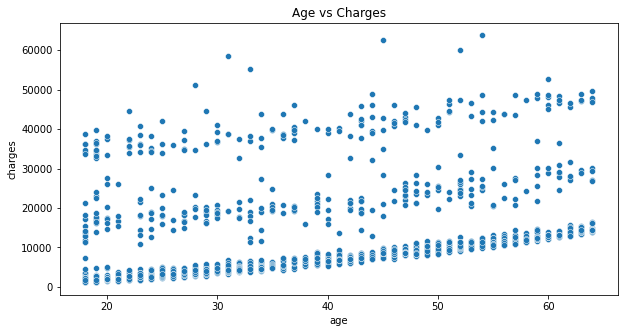

In [21]:
plt.figure(figsize=(10,5))
sb.scatterplot(dataset["age"],dataset["charges"])
plt.title("Age vs Charges")
# As age increases charges increases

In [22]:
# DATA PREPROCESSING
dataset_copy=dataset.copy()
y=dataset_copy["charges"].values
X=dataset_copy.drop(columns=["charges"]).values

In [23]:
# SPLITTING THE DATA INTO TEST AND TRAIN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
# SCALING 
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
print(X_train.shape,X_test.shape) 

(895, 6) (442, 6)


In [25]:
# LINEAR REGRESSION
model1=LinearRegression()

In [26]:
model1.fit(X_train,y_train)
linear_predict=model1.predict(X_test)

In [27]:
print(f"Coefficients:{model1.coef_}")
print(f"Intercept Value:{model1.intercept_}")
print(f"Rank:{model1.rank_}")
print(f"Mean Squared Error:{mean_squared_error(y_test,linear_predict)}")
print(f"Mean Absolute Error:{mean_absolute_error(y_test,linear_predict)}")
print(f"R2 Score:{r2_score(y_test,linear_predict)}")

Coefficients:[11720.07498009  -101.66191599 11794.09466763  2144.99614455
 22698.15808687  -765.08059959]
Intercept Value:-1720.8027340888366
Rank:6
Mean Squared Error:38008832.30496469
Mean Absolute Error:4411.544857855716
R2 Score:0.7765507264879107


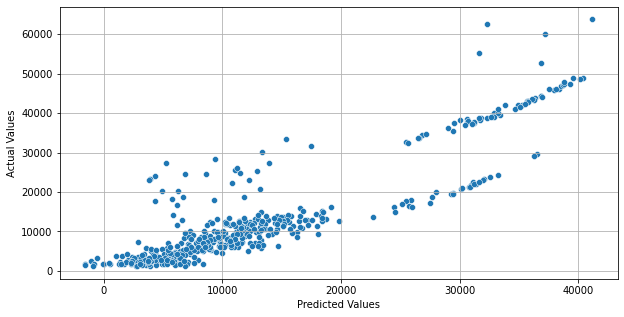

In [28]:
fig=plt.figure(figsize=(10,5))
sb.scatterplot(x=linear_predict,y=y_test,ci=68)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.grid()
plt.show()
# We can see that our model is well but not good enough.

In [29]:
# RIDGE REGRESSION

parameters = {
    'alpha':[.0001, 0.001,0.01, 0.01,1],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
       }

In [30]:
ridge_reg = Ridge() 

In [31]:
# Grid Search
search = GridSearchCV(ridge_reg, parameters, scoring='r2', n_jobs=-1, cv=10)
search.fit(X_train, y_train)

print("\n","Best parameters:",search.best_estimator_.get_params())

CV_Result = cross_val_score(search, X_train, y_train, cv=10, n_jobs=-1, scoring="r2")
print("\n",CV_Result)
print("\n",CV_Result.mean())
print("\n",CV_Result.std())


 Best parameters: {'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': True, 'positive': False, 'random_state': None, 'solver': 'sag', 'tol': 0.001}

 [0.68829736 0.77139314 0.74455814 0.7472718  0.70062321 0.68477249
 0.69098873 0.79398347 0.64082757 0.7580604 ]

 0.7220776305177699

 0.04538558541987433


In [32]:
ridge_best=Ridge(alpha=0.01,fit_intercept=True,normalize=False,solver="sag",max_iter=None)

In [33]:
ridge_model=ridge_best.fit(X_train,y_train)

In [34]:
ridge_predict=ridge_model.predict(X_test)

In [35]:
print(f"Coefficients:{ridge_model.coef_}")
print(f"Intercept Value:{ridge_model.intercept_}")
print(f"Mean Squared Error:{mean_squared_error(y_test,ridge_predict)}")
print(f"Mean Absolute Error:{mean_absolute_error(y_test,linear_predict)}")
print(f"R2 Score:{r2_score(y_test,ridge_predict)}")
# R2 Score is the same as linear regression r2 score.

Coefficients:[11727.79202106  -113.32962995 11795.03652019  2141.69519943
 22693.09404516  -770.29999858]
Intercept Value:-1714.2004193218563
Mean Squared Error:38014162.69521491
Mean Absolute Error:4411.544857855716
R2 Score:0.7765193897759751


In [36]:
# SUPPORT VECTOR REGRESSION
y_c=dataset_copy["charges"].values.reshape(-1,1)
X_c=dataset_copy.drop(columns=["charges"]).values

In [37]:
X_train_copy, X_test_copy, y_train_coyp, y_test_copy = train_test_split(X_c, y_c, test_size=0.20, random_state=42)

In [38]:
scaled_y_train_c=scaler.fit_transform(y_train_coyp)
scaled_y_test_c=scaler.fit_transform(y_test_copy)
scaled_X_test_c=scaler.fit_transform(X_test_copy)
scaled_X_train_c=scaler.fit_transform(X_train_copy)

In [39]:
regressor=SVR()

In [40]:
parameters = [{
'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
'C': [1,2,3,10,300,500],
'max_iter': [1000,10000,100000]}]

clf = GridSearchCV(
        SVR(), parameters, scoring='accuracy',)


In [41]:
grid_fitted_model=clf.fit(scaled_X_train_c,scaled_y_train_c)

In [42]:
grid_fitted_model

GridSearchCV(estimator=SVR(),
             param_grid=[{'C': [1, 2, 3, 10, 300, 500],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                          'max_iter': [1000, 10000, 100000]}],
             scoring='accuracy')

In [43]:
print(clf.best_estimator_)

SVR(C=1, kernel='linear', max_iter=1000)


In [44]:
svr_best=SVR(C=1,kernel="linear",max_iter=1000)

In [45]:
svr_model=svr_best.fit(scaled_X_train_c,scaled_y_train_c)

In [46]:
svr_model_predict_test=svr_model.predict(scaled_X_test_c)
svr_model_predict_train=svr_model.predict(scaled_X_train_c)

In [47]:
print(f"R2 Score for X test:{r2_score(scaled_y_test_c,svr_model_predict_test)}")
print(f"R2 Score for X train:{r2_score(scaled_y_train_c,svr_model_predict_train)}")
print(f"Mean Squared Error:{mean_squared_error(scaled_y_test_c,svr_model_predict_test)}")
print(f"Mean Absolute Error:{mean_absolute_error(scaled_y_test_c,svr_model_predict_test)}")

R2 Score for X test:0.7778827709054779
R2 Score for X train:0.7097312820721432
Mean Squared Error:0.010402443966159391
Mean Absolute Error:0.08260620199129406
